In [101]:
import numpy as np
import numpy.linalg as la
import pandas as pd
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib as mpl
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)

save_path = r'C:\Users\reape\Desktop\Sp24\NPRE 349\Hw7\\'

In [19]:
#9.1
#Constants
L, k, T1, T2 = 75e-3, 2.5, 200, 100

#h values
h_min = np.array([2,50,25,100,2500])
h_max = np.array([25,1000,250,2e4,1e5])

#q values
def q_func(h):
    return (T1-T2)/(2/h+L/k)
q_min, q_max = q_func(h_min), q_func(h_max)

#Tabulating
table91 = pd.DataFrame(np.array([h_min,h_max,q_min,q_max]))
table91.index = ['h min','h max','q flux min','q flux max']
table91.columns = ['free gas','free liquid','forced gas','forced liquid','phase change']
display(HTML(table91.T.to_html()))

,h min,h max,q flux min,q flux max
free gas,2.0,25.0,97.087379,909.090909
free liquid,50.0,1000.0,1428.571429,3125.000000
forced gas,25.0,250.0,909.090909,2631.578947
forced liquid,100.0,20000.0,2000.000000,3322.259136
phase change,2500.0,100000.0,3246.753247,3331.112592


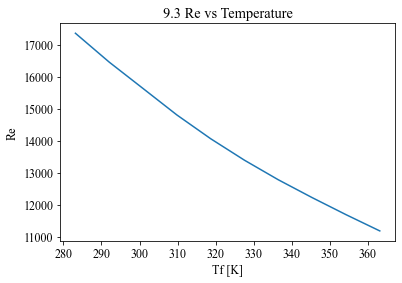

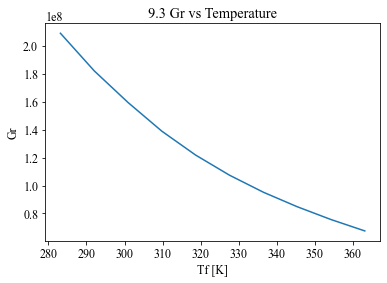

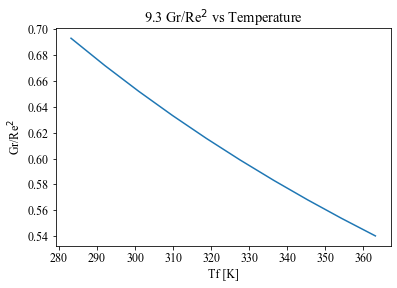

In [105]:
#9.3
#Constants
v, dT, Lc, g = .5, 10, .5, 9.81
T = np.linspace(283.15,363.15, 10)
nu = np.zeros(len(T))

#Nu values
nus = np.array([(250,300,350,400), (11.44e-6,15.89e-6,20.92e-6,26.41e-6)]).T
beta = 1/Temp

#Interpolation
def interp(T):
    i = 0
    while nus[i][0] <= T:
        i+=1
    return (T-nus[i-1][0])/(nus[i][0]-nus[i-1][0])*(nus[i][1]-nus[i-1][1]) + nus[i-1][1]

for i in range(len(T)):
    nu[i] = interp(T[i])
    
#Solving For Dimensionless Groups
Re = v*Lc/nu
Gr = g*dT*Lc**3/nu**2/T
ratio = Gr/Re**2

#Plotting
plot_arr = np.array([Re, Gr, ratio])
title_arr = np.array(['Re', 'Gr', 'Gr/Re$^2$'])

for i in range(len(plot_arr)):
    plt.plot(T, plot_arr[i])
    plt.title('9.3 {} vs Temperature'.format(title_arr[i]))
    plt.xlabel('Tf [K]')
    plt.ylabel(title_arr[i])
    plt.savefig(save_path+'9dot3 {}'.format(i), dpi=600)
    plt.show()